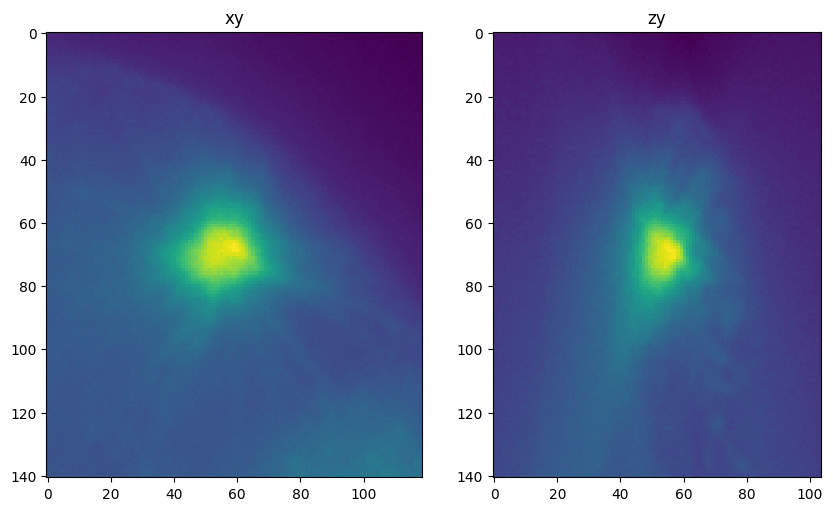

In [7]:
from skimage.io import imread
from tnia.plotting.projections import show_xy_zy_slice

path_=r"D:\images\tnia-python-images\deconvolution\c.elegans"

im = imread(path_ + r"\CElegans-FITC-c.tif")

xtv=51
ytv=im.shape[1]//2
ztv=im.shape[0]//2
fig=show_xy_zy_slice(im, xtv, ytv, ztv, 1, 1, figsize=(10,10))

In [16]:
import napari
viewer = napari.Viewer()
viewer.show()
viewer.add_image(im, name='c.elegans', colormap='green', scale=(1,1,3))

<Image layer 'c.elegans' at 0x21bb4ab60a0>

sdeconv 1.x.x detected


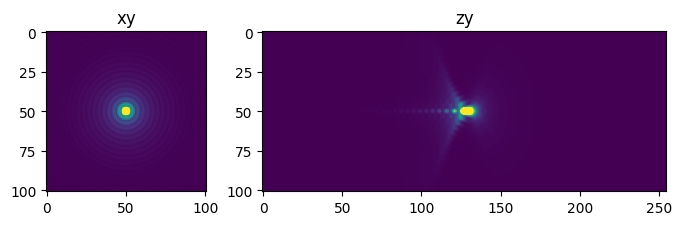

In [8]:
from tnia.nd.ndutil import centercrop
from tnia.deconvolution.psfs import gibson_lanni_3D
from tnia.plotting.projections import show_xy_zy_max
from tnia.deconvolution.psfs import recenter_psf_axial
from skimage.io import imsave

ni=1.518
ns_to_test=[1.42,1.44,1.46,1.48,1.50,1.518]
ns=1.42
NA=1.4
w=0.542

xy_spacing = 0.0645
z_spacing=.16

ratio=z_spacing/xy_spacing

xy_psf_dim=101
z_compute_psf_dim=599
z_crop_psf_dim=101

#depth to compute PSF at
d=52*z_spacing


psf  = gibson_lanni_3D(NA, ni, ns, xy_spacing, z_spacing, xy_psf_dim, z_compute_psf_dim, d, w)
psf = psf.astype('float32')

#fig=show_xy_zy_max(psf, vmax=psf.max())
psf=recenter_psf_axial(psf, 255)
#psf,labels=recenter_psf_axial(psf, 255, return_labels=True)
#fig=show_xy_zy_max(labels)
fig=show_xy_zy_max(psf, vmax=psf.max()/4, figsize=(8,4))

get lib


Text(0.5, 0.98, 'decon')

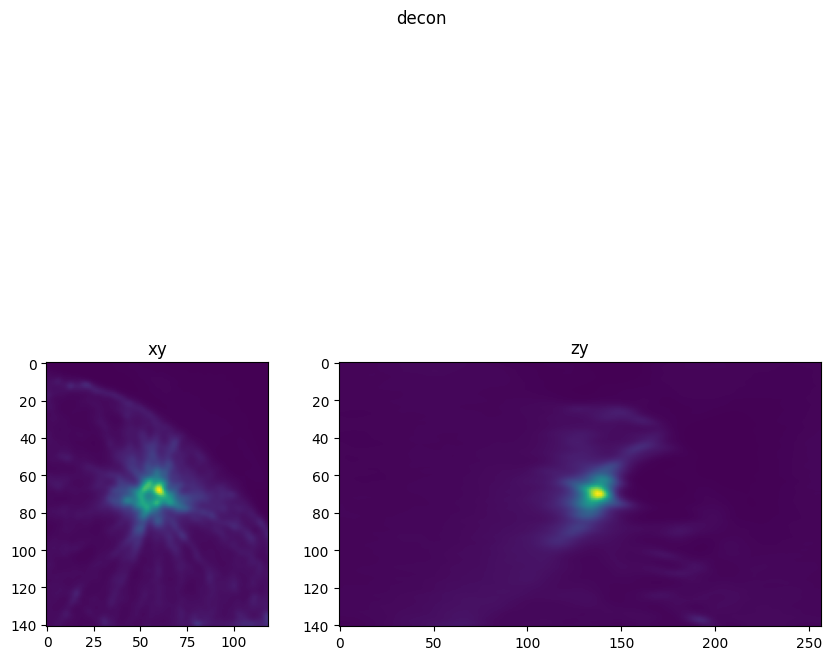

In [10]:

from clij2fft.richardson_lucy import richardson_lucy_nc
regularization_factor=0.0

im_decon = richardson_lucy_nc(im, psf, 500, regularization_factor)
fig=show_xy_zy_slice(im_decon,xtv, ytv, ztv, sz=ratio, figsize=(10,10))
fig.suptitle('decon')